# Análise de IA nos trabalhos

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ai_job_df = pd.read_csv('/content/ai_job_trends_dataset.csv')
ai_job_df.head()

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


## Analisando o DataFrame

In [3]:
ai_job_df.describe()

,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,90119.965639,10.051433,5039.640833,5074.218100,49.836431,50.154229,49.979660
std,34412.013953,6.060678,2861.009654,2866.550722,28.966688,28.754889,17.274665
min,30001.860000,0.000000,100.000000,100.000000,0.000000,0.000000,20.000000
25%,60500.702500,5.000000,2570.000000,2586.750000,24.570000,25.400000,35.070000
50%,90274.115000,10.000000,5034.000000,5106.500000,49.570000,50.020000,49.885000
75%,119454.710000,15.000000,7527.000000,7573.000000,75.100000,75.030000,64.910000
max,149998.500000,20.000000,10000.000000,10000.000000,100.000000,99.990000,80.000000


In [4]:
ai_job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [5]:
ai_job_df.columns

Index(['Job Title', 'Industry', 'Job Status', 'AI Impact Level',
       'Median Salary (USD)', 'Required Education',
       'Experience Required (Years)', 'Job Openings (2024)',
       'Projected Openings (2030)', 'Remote Work Ratio (%)',
       'Automation Risk (%)', 'Location', 'Gender Diversity (%)'],
      dtype='object')

## Análise

A análise consiste em responder 6 perguntas:
1. Qual indústria tem maior risco de automação?
2. Quais os 10 empregos com maior e menor risco de automação?
3. Qual o número de vagas por impacto da IA?
4. Qual o salário médio por impacto da IA?
5. Qual a distribuição de risco por nível educacional?
6. Qual a correlação entre risco de automação e salário?

## 1. Qual indústria tem maior risco de automação?

In [22]:
# Transformando a coluna para valores de ponto flutuante
ai_job_df['Automation Risk (%)'] = ai_job_df['Automation Risk (%)'].astype(float)

# Agrupando a média de 'Automation Risk (%)' para cada indústria
avg_automacao = ai_job_df.groupby('Industry')['Automation Risk (%)'].mean().round(2)
avg_automacao.head(3).sort_values(ascending=False)

,Automation Risk (%)
Industry,
Entertainment,50.59
Finance,50.51
Education,50.01


Beseado na média da coluna 'Automation Risk (%)' para cada indústria, vê-se que o entretenimento tem o maior risco de automação, seguido por finanças e educação.

## 2. Quais os 10 empregos com maior e menor risco de automação?

In [6]:
# Selecionar os 5 cargos com maior e menor risco
maior_risco = ai_job_df.nlargest(10, 'Automation Risk (%)')
menor_risco = ai_job_df.nsmallest(10, 'Automation Risk (%)')

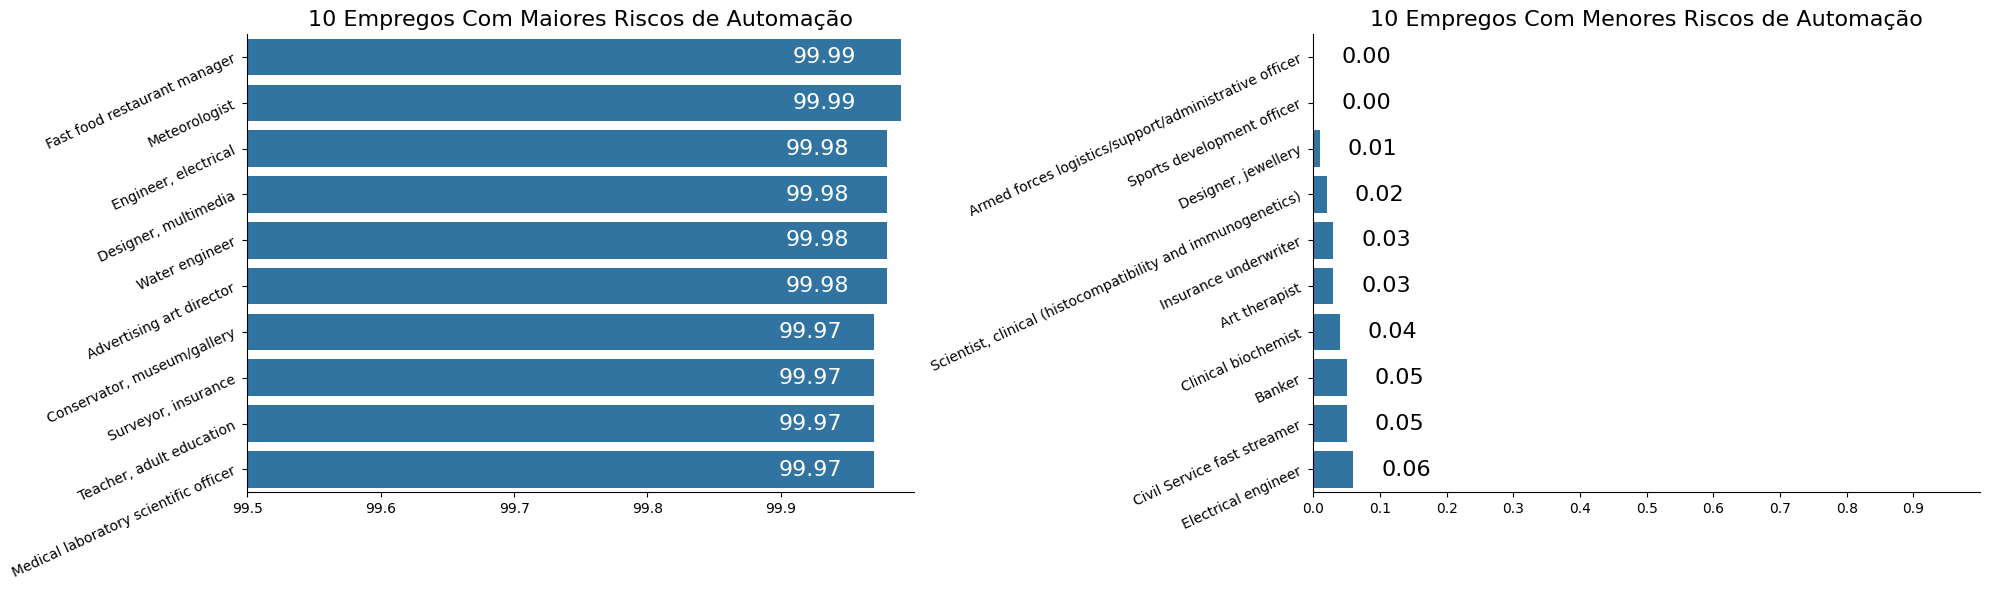

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando a moldura para os gráficos
fig, ax = plt.subplots(1, 2, figsize=(20, 6))


# Gráfico do maior risco
ax1 = sns.barplot(data=maior_risco, x='Automation Risk (%)', y='Job Title', ax=ax[0])

# Função para adicionar rótulos nas barras
for container in ax1.containers:
  ax1.bar_label(container, fmt='%.2f', label_type='center', fontsize=16, padding=180, color='white')


# Gráfico do menor risco (assumindo que você tem essa variável)
ax2 = sns.barplot(data=menor_risco, x='Automation Risk (%)', y='Job Title', ax=ax[1])

# Função para adicionar rótulos nas barras
for container in ax2.containers:
  ax2.bar_label(container, fmt='%.2f', label_type='edge', fontsize=16, padding=20)


# Personalização dos gráficos

# Gráfico 1 (Maiores riscos)
ax1.set_title('10 Empregos Com Maiores Riscos de Automação', fontsize=16) # Título do gráfico
ax1.set_xlim(99.5, 100) # Definindo o limite do eixo x
ax1.set_xticks(np.arange(99.5, 100, 0.1)) # Determinando os pontos no gráfico no eixo x
ax1.tick_params(axis='y', labelrotation=25) # Rotacionando as labels do eixo y
ax1.spines[['top', 'right']].set_visible(False) # Retirando as linhas de cima e a direita do gráfico
ax1.set_xlabel('')
ax1.set_ylabel('')

# Gráfico 2 (Menores riscos)
ax2.set_title('10 Empregos Com Menores Riscos de Automação', fontsize=16) # Título do gráfico
ax2.set_xlim(0, 1) # Definindo o limite do eixo x
ax2.set_xticks(np.arange(0, 1, 0.1)) # Determinando os pontos no gráfico no eixo x
ax2.tick_params(axis='y', labelrotation=25) # Rotacionando as labels do eixo y
ax2.spines[['top', 'right']].set_visible(False) # Retirando as linhas de cima e a direita do gráfico
ax2.set_ylabel('')
ax2.set_xlabel('')


# Função para ajustar os gráficos na moldura
plt.tight_layout()
# Mostra os gráficos
plt.show()

## 3. Qual o número de vagas por impacto da IA?

In [45]:
# Agrupando a soma das vagas abertas por nível do impacto e resetando o índice
vagas_por_nivel = ai_job_df.groupby('AI Impact Level', as_index=False)['Job Openings (2024)'].sum()

# Renomeando as colunas
vagas_por_nivel.columns = ['Nível de Impacto', 'Total de Vagas Abertas']

# Formatando a coluna 'Total de Vagas Abertas' para milhar
vagas_por_nivel['Total de Vagas Abertas'] = vagas_por_nivel['Total de Vagas Abertas'].apply(lambda x: f"{x:,.0f}".replace(',', '.'))

vagas_por_nivel

,Nível de Impacto,Total de Vagas Abertas
0,High,50.225.587
1,Low,50.170.073
2,Moderate,50.793.565


## 4. Qual o salário médio por impacto da IA?

In [61]:
# Agrupando a média dos salários por impacto da IA
avg_salario_nivel = ai_job_df.groupby('AI Impact Level', as_index=False)['Median Salary (USD)'].mean()

# Renomeando as colunas
avg_salario_nivel.columns = ['Nível de Impacto', 'Salário Médio (USD)']

# Formatando os dados da coluna 'Salário Médio (USD)'
avg_salario_nivel['Salário Médio (USD)'] = avg_salario_nivel['Salário Médio (USD)'].apply(lambda x: f"{x:,.2f}".replace('.',',').replace(',','.',1))

avg_salario_nivel

,Nível de Impacto,Salário Médio (USD)
0,High,"90.354,78"
1,Low,"90.265,04"
2,Moderate,"89.742,23"


## 5. Qual a distribuição de risco por nível educacional?

In [68]:
# Agrupando a média de risco por nível educacional a cada indústria
ai_job_df.groupby(['Industry', 'Required Education'])['Automation Risk (%)'].mean().round(2)

Industry        Required Education
Education       Associate Degree      48.24
                Bachelor’s Degree     50.62
                High School           50.22
                Master’s Degree       49.55
                PhD                   51.51
Entertainment   Associate Degree      48.86
                Bachelor’s Degree     50.94
                High School           50.93
                Master’s Degree       50.26
                PhD                   52.02
Finance         Associate Degree      50.69
                Bachelor’s Degree     51.47
                High School           49.08
                Master’s Degree       50.28
                PhD                   51.15
Healthcare      Associate Degree      50.78
                Bachelor’s Degree     48.96
                High School           50.01
                Master’s Degree       51.03
                PhD                   50.56
IT              Associate Degree      51.19
                Bachelor’s Degree     49.98
                High School           49.36
                Master’s Degree       48.47
                PhD                   50.33
Manufacturing   Associate Degree      50.99
                Bachelor’s Degree     47.58
                High School           49.16
                Master’s Degree       51.78
                PhD                   48.70
Retail          Associate Degree      48.79
                Bachelor’s Degree     49.84
                High School           50.63
                Master’s Degree       49.56
                PhD                   49.30
Transportation  Associate Degree      50.39
                Bachelor’s Degree     48.69
                High School           51.55
                Master’s Degree       51.47
                PhD                   51.88
Name: Automation Risk (%), dtype: float64

## 6. Qual a correlação entre risco de automação e salário?

In [69]:
ai_job_df.columns

Index(['Job Title', 'Industry', 'Job Status', 'AI Impact Level',
       'Median Salary (USD)', 'Required Education',
       'Experience Required (Years)', 'Job Openings (2024)',
       'Projected Openings (2030)', 'Remote Work Ratio (%)',
       'Automation Risk (%)', 'Location', 'Gender Diversity (%)'],
      dtype='object')

In [86]:
# Criando análise
risco_por_salario = ai_job_df.groupby('Industry', as_index=False).agg({'Median Salary (USD)': 'mean',
                                                           'Automation Risk (%)': 'mean'})

# Formatando as colunas numéricas
risco_por_salario['Median Salary (USD)'] = risco_por_salario['Median Salary (USD)'].apply(lambda x: f'{x:,.2f}'.replace('.', ',').replace(',', '.', 1))
risco_por_salario['Automation Risk (%)'] = risco_por_salario['Automation Risk (%)'].apply(lambda x: f'{x:.2f}')

risco_por_salario.sort_values('Median Salary (USD)', ascending=False)

,Industry,Median Salary (USD),Automation Risk (%)
4,IT,"90.941,67",49.88
6,Retail,"90.903,68",49.61
2,Finance,"90.510,60",50.51
1,Entertainment,"90.131,00",50.59
5,Manufacturing,"89.880,03",49.59
0,Education,"89.665,73",50.01
3,Healthcare,"89.494,07",50.27
7,Transportation,"89.450,66",50.79
